In [5]:
import h5py
import cortex
import numpy as np

In [3]:
# get mask
subject, xfm = 'S1', 'fullhead'
mask = cortex.db.get_mask(subject, xfm)

#### brain image

In [3]:
resp = h5py.File('validation_notavg.hf5','r+')['data'][()]
resp = resp[:, :31]

In [4]:
mask.shape, resp.shape

((31, 100, 100), (900, 31, 100, 100))

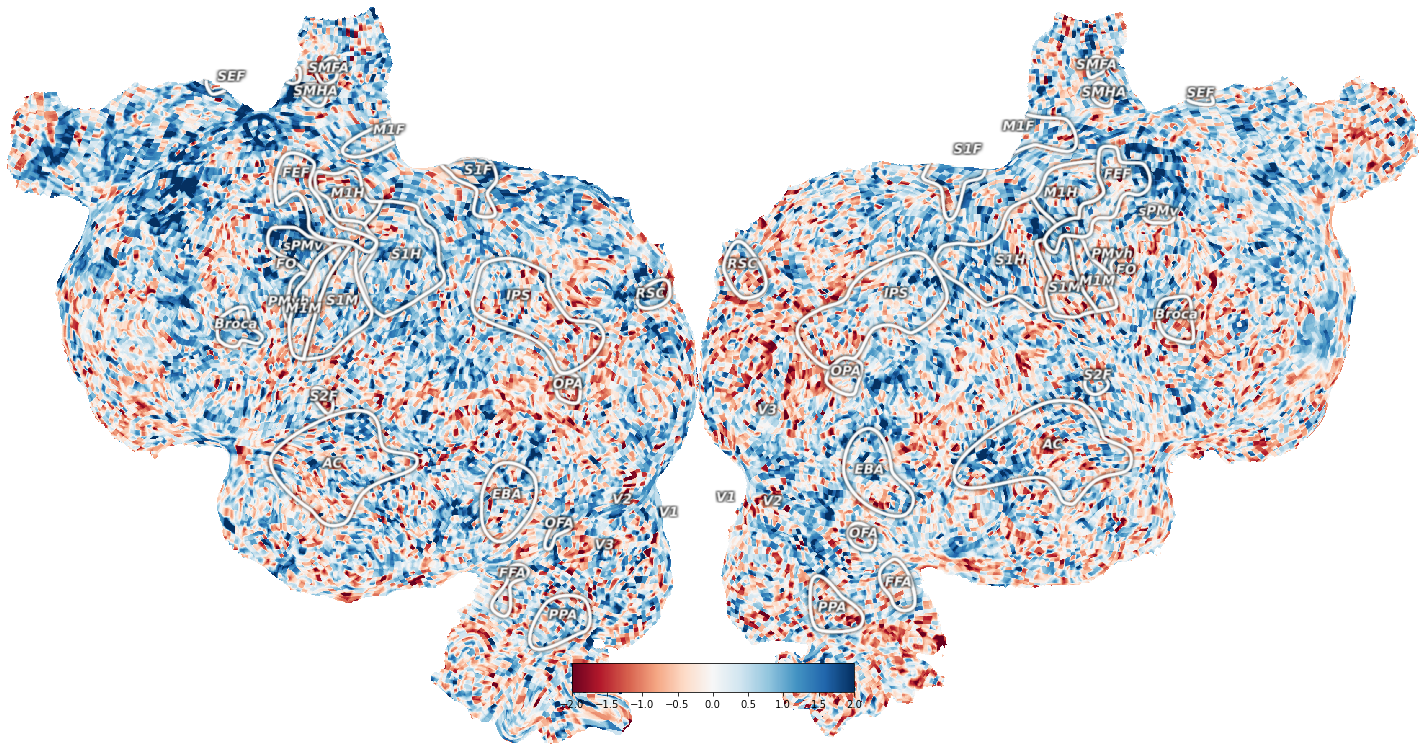

In [5]:
# plot volume 8
data_vol = cortex.Volume(resp[8], 'S1', xfm, cmap='RdBu', vmin=-2, vmax=2);
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth = 5);

#### functional ROI

In [6]:
# choose functional roi 
roi = 'AC'
# get 3d mask of voxels that belong to roi
roi_mask = cortex.utils.get_roi_masks(subject, xfm, roi_list = [roi], gm_sampler = 'cortical', split_lr = False, threshold = None, return_dict = True)[roi]
# get indices of roi voxels in cortical map
roi_vox = np.where(roi_mask[np.where(mask)])[0]

Cutting 0 overlapping voxels (should be < ~50)


In [8]:
print(roi_vox)

[10682 10735 10736 ... 43210 43264 43317]


Generating a flatmap cache


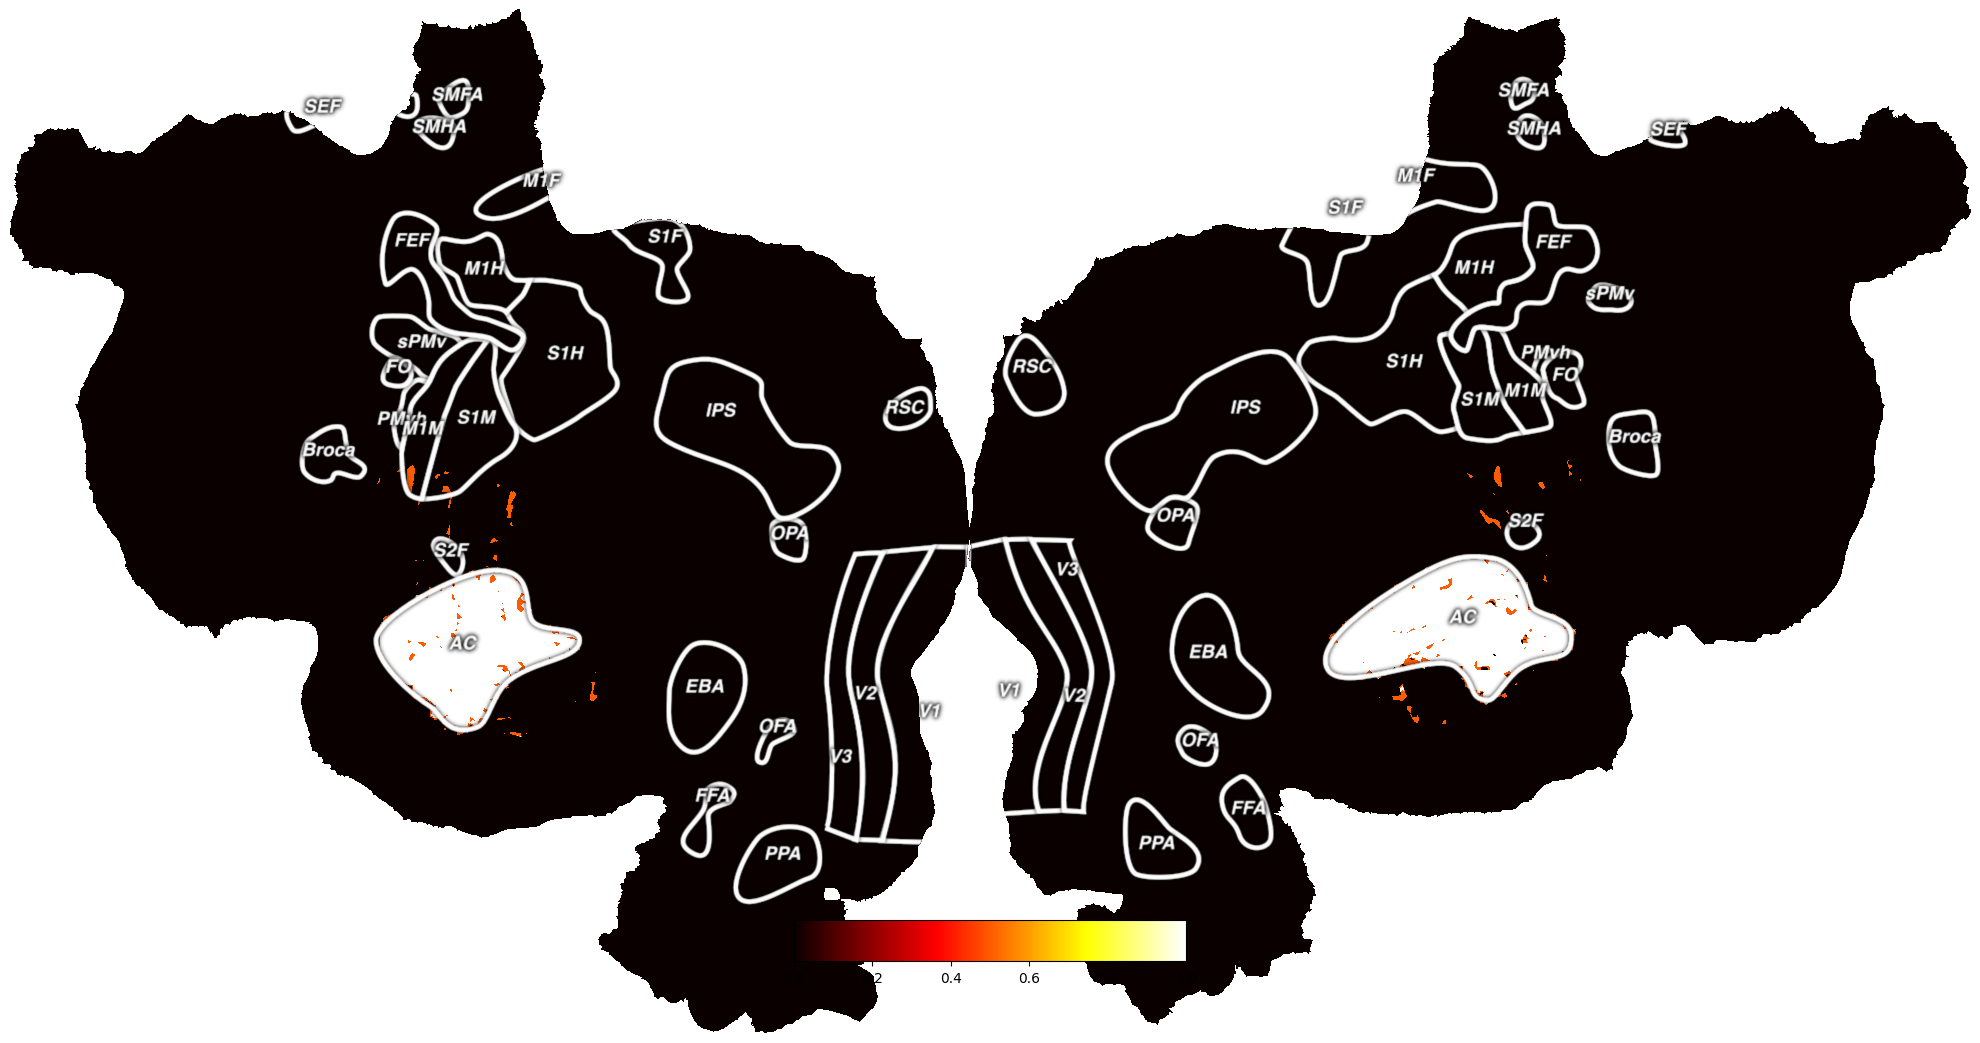

In [7]:
# plot roi voxels
fm = np.zeros(np.sum(mask))
fm[roi_vox] = 1
data_3d = cortex.unmask(mask, fm)
data_vol = cortex.Volume(data_3d, subject, xfm, cmap='hot', vmin=0, vmax=1)
cortex.quickshow(data_vol, with_labels=True, with_rois=True, linewidth=5, thick=2);